In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
import scipy.special as sc
from scipy.optimize import fsolve
from scipy.stats import norm
from scipy.stats import pareto
from scipy.stats import truncnorm
import time
np.random.seed(5)

In [2]:
def auction_exp(data_auction, p):
    """auction experiment simulation

    Args:
        data_auction: random sample data for auction simulation
        p: the reserve price
        
    Return:
        revenue: the expected revenue
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [3]:
def rejection_sampling(pi1, pi2, N):
    """rejection sampling algorithm

    Args:
        pi1,pi2: the range of log-lottery distribution
        N: the number of samples from the log-lottery distribution
        
    Return:
        rej_sample: The random samples from the log-lottery distribution
    """

    #using rejection sampling, get N random price samples
    n = 0
    don = pi2*np.log(pi2/pi1) - (pi2-pi1)
    env =(pi2/pi1-1)/don
    rej_sample =[]
    while(n <= N):
        x = uniform.rvs(loc=pi1, scale=pi2-pi1)
        #a is acception probability
        a = (pi2/x-1)/don/env
        u1 = uniform.rvs()
        if (u1 <= a):
            rej_sample.append(x)
            n += 1
    return rej_sample

In [4]:
#test performance

#Azard and Marcili k(r) function
def k_r(x):
    return (0.5*(3*x +x**3) -1/r_m)
#Equavelent funtion like A&M, but using consistent notation with Robust paper
def rho_tilde(x):
    return ((x-1)**3)/(x**2) - (27/4)*r_m**2 
#Deterministic DAPX from the Robust paper
def rho_D(x):
    return ((x-1)**3)/((2*x-1)**2) - r_m**2  

def log_lottery(x):
    return (x * (1 + np.log(cons_m/(x**2) + 1) - np.log(2)) -u_m )


#theorem 2 
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r_m**2 - x**2)

tic = time.clock()


step = np.linspace(0.02,10,50)
n = 100000
m = 50
k = 30
for i in step:
    r = i
    c = 1+np.sqrt(1+1/(r**2))

    u, var = pareto.stats(c, moments='mv')
    #print(u,var)
    sigma = np.sqrt(var)
    r = sigma/u

 
    #Compute the mean and standard deviation for the convolution of the Perato(0) distributions    
    u_m = m*u
    sigma_m = np.sqrt(m)*sigma
    r_m = sigma_m/u_m

    r_rho = fsolve(random_rho, [u_m])

    print(random_rho(r_rho))
    
    
toc = time.clock()
print('time: ' + str(toc-tic))    

[0.]
[-2.22044605e-16]
[-2.22044605e-16]
[2.22044605e-16]
[0.]
[-4.4408921e-16]
[0.]
[0.]
[0.]
[4.4408921e-16]
[4.4408921e-16]
[0.]
[1.34114941e-13]
[-8.8817842e-16]
[7.99360578e-15]
[3.41060513e-13]
[-8.8817842e-16]
[0.]
[8.8817842e-16]
[-1.77635684e-15]
[-8.8817842e-16]
[0.]
[0.]
[-1.77635684e-15]
[0.]
[1.77635684e-15]
[0.]
[0.]
[1.77635684e-15]
[-1.77635684e-15]
[0.]
[2.16360263e-12]
[8.34887715e-13]
[3.05533376e-13]
[1.0658141e-13]
[3.55271368e-14]
[1.24344979e-14]
[1.77635684e-15]
[3.55271368e-15]
[3.55271368e-15]
[3.55271368e-15]
[-1.77635684e-15]
[7.10542736e-15]
[1.42108547e-14]
[7.31148475e-12]
[2.71782596e-12]
[9.73443548e-13]
[3.62376795e-13]
[1.03028697e-13]
[2.48689958e-14]
time: 0.1397905000000037


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [5]:
##This script is used to perform Experiment 1 for Pareto(1) distribution

#Azard and Marcili k(r) function
def k_r(x):
    return (0.5*(3*x +x**3) -1/r_m)

#Equavelent funtion like A&M, but using consistent notation with Robust paper
def rho_tilde(x):
    return ((x-1)**3)/(x**2) - (27/4)*r_m**2 

#Solve pi1 for the log-lottery distribution
def log_lottery(x):
    return (x * (1 + np.log(cons_m/(x**2) + 1) - np.log(2)) -u_m )

#Definition 5.1:  rho function used to compute the APX theoretical upper bound
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r_m**2 - x**2)

tic = time.clock()
r_list =[]
p_d_list = []
c_list =[]
u_m_list =[]
rho_list =[]
r_rho_list=[]
rev_A_list = []
rev_A1_list=[]
DAPX = []
#bundling price for Azar and Micali mechanism
p_AM = []
p_AM_list = []
p_A1_list = []
rev_A2_list = []
p_A2_list = []
APX_pareto1_list = []
APX_rev_list = []
step = np.linspace(0.01,10,50)
n = 100000
m = 5
k = 30
for i in step:
    r = i
    c = 1+np.sqrt(1+1/(r**2))
    c_list.append(c)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    bid_pareto1 = []
    bid_pareto1= pareto.rvs(c,size=n)
    r = sigma/u
    r_list.append(r)
    p_opt = 1

    
    #1.Compute expected revenue for A1:selling separately with optimal reserve price
    rev_A1 = m*auction_exp(bid_pareto1,p_opt)
    rev_A1_list.append(rev_A1)
    ##################################################################################
    
    #Generate randome variables Y, where Y = sum (X1,X2,...,Xm)
    j = 0
    bundlebid_pareto1 = []
    while j < n:
        bid = pareto.rvs(c,size=m)
        bundlebid_pareto1.append(sum(bid))
        j += 1

    #Compute the mean and standard deviation for the convolution of the Perato(0) distributions    
    u_m = m*u
    u_m_list.append(u_m)
    sigma_m = np.sqrt(m)*sigma
    r_m = sigma_m/u_m
                
##### This is direct implementation for Azard and Marcili mechanism
#     k = fsolve(k_r, [u])
#     print(k_r(k))
#     p.append(u - k*sigma)

    #2/ This is equavelent to the Azard and Marcili mechanism, just different notation
    # Here we obtain the expected revenue for Azard and Marcili mechanism
    rho = fsolve(rho_tilde, u_m)
    rho_list.append(rho[0])
    p_AM = u_m*(rho+2)/(3*rho)
    p_AM_list.append(p_AM)
    print(rho_tilde(rho))
    rev_A = auction_exp(bundlebid_pareto1,p_AM)
    rev_A_list.append(rev_A[0])
    
    DAPX.append(u_m/rev_A[0])
    ###########################################################################################
    #3. Here we obtain the expected revenue for A2: selling it grand bundle with optimal reserve price
    # We use discretization here
    prices = np.linspace(p_AM,u_m,k+2)[1:] #we want k discrete values between p_AM and u_m, here we also include u_m to have a look
    rev = []
    for p in prices:
        rev.append(auction_exp(bundlebid_pareto1,p))
    #Store the highest expected revenue and corresponding reserve price    
    rev_A2 = max(rev)
    rev_A2_list.append(rev_A2[0])    
    p_A2_list.append(prices[np.argmax(rev)])
    #################################################################################
    #4.Experiment with the log-lottery auction
    #compute the APX using the full-bundle log lottery auction 
    cons_m = u_m**2 + sigma_m**2
    pi1 = fsolve(log_lottery, [u_m-0.2])
    pi2 = 0.5*(cons_m/pi1 +pi1)
    print(log_lottery(pi1))
    rej_sample = []
    rej_sample = rejection_sampling(pi1,pi2,10000)
    rexp_revenue_list =[]
    for rp_reserve in rej_sample:
        rexp_revenue_list.append(auction_exp(bundlebid_pareto1,rp_reserve))
  
    APX_rev = np.average(rexp_revenue_list)
    APX_rev_list.append(APX_rev)
    APX_pareto1_list.append(u_m/APX_rev)
    
    #compute the APX using full-bundle log lottery randomization  
    r_rho = fsolve(random_rho, [u_m])
    r_rho_list.append(r_rho[0])
    print(random_rho(r_rho))
    
    
toc = time.clock()
print('time: ' + str(toc-tic))    
# print('the expected revenue for Azard and Marcili: ' + str(rev_A))    
# print('the expected revenue for selling separately: ' + str(rev_A1))
# print('the expected revenue for boundle selling: ' + str(rev_A2))

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[1.8973538e-19]
[-2.66453526e-15]
[-2.22044605e-16]
[3.46944695e-17]
[-1.77635684e-15]


KeyboardInterrupt: 

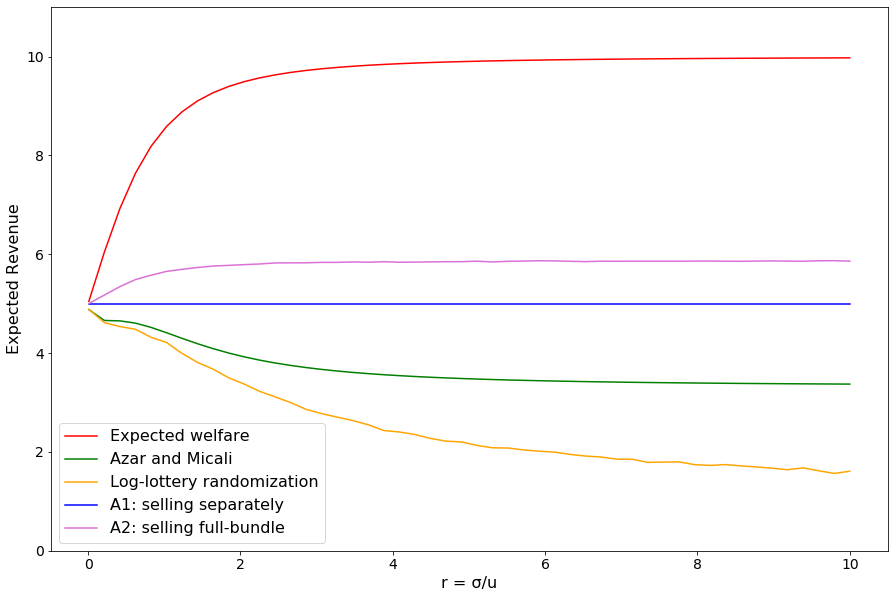

In [29]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 14)
plt.tick_params(axis='y', labelsize= 14)
#ax2.axhline(0,color="red")
plt.xlabel("r = \u03C3/u",fontsize=16)
plt.ylabel("Expected Revenue",fontsize=16)
# plt.axhline(u_m,color="red",label="Expected welfare")
plt.plot(r_list, u_m_list,color="red",label="Expected welfare")
plt.plot(r_list, rev_A_list,color="green",label="Azar and Micali")
plt.plot(r_list, APX_rev_list, color="#FFA500",label="Log-lottery randomization")
plt.plot(r_list, rev_A1_list,color="blue",label="A1: selling separately")
plt.plot(r_list, rev_A2_list, color="orchid",label="A2: selling full-bundle")
plt.ylim(0,11)
plt.legend(loc="best",fontsize = 16)
#plt.savefig("p1m5_rev.png",bbox_inches='tight')

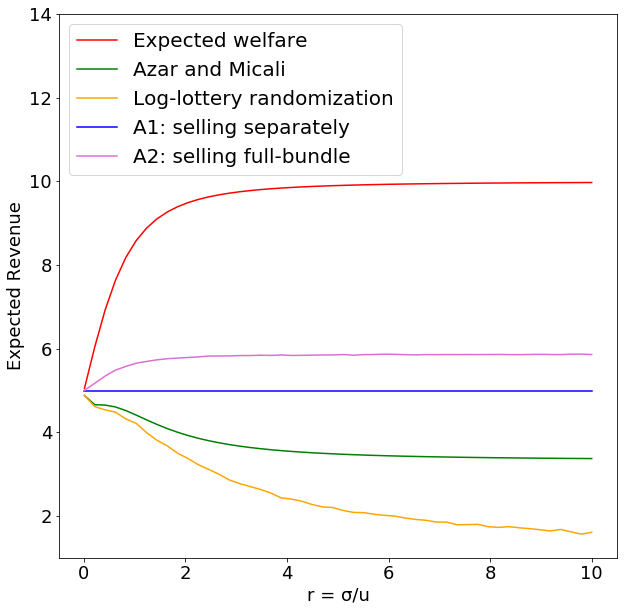

In [17]:
plt.figure(figsize=(10,10))
plt.tick_params(axis='x', labelsize= 18)
plt.tick_params(axis='y', labelsize= 18)
#ax2.axhline(0,color="red")
plt.xlabel("r = \u03C3/u",fontsize=18)
plt.ylabel("Expected Revenue",fontsize=18)
# plt.axhline(u_m,color="red",label="Expected welfare")
plt.plot(r_list, u_m_list,color="red",label="Expected welfare")
plt.plot(r_list, rev_A_list,color="green",label="Azar and Micali")
plt.plot(r_list, APX_rev_list, color="#FFA500",label="Log-lottery randomization")
plt.plot(r_list, rev_A1_list,color="blue",label="A1: selling separately")
plt.plot(r_list, rev_A2_list, color="orchid",label="A2: selling full-bundle")
plt.ylim(1,14)
plt.legend(loc="upper left",fontsize = 20)
#plt.savefig("p1m5_rev_s.png",bbox_inches='tight')

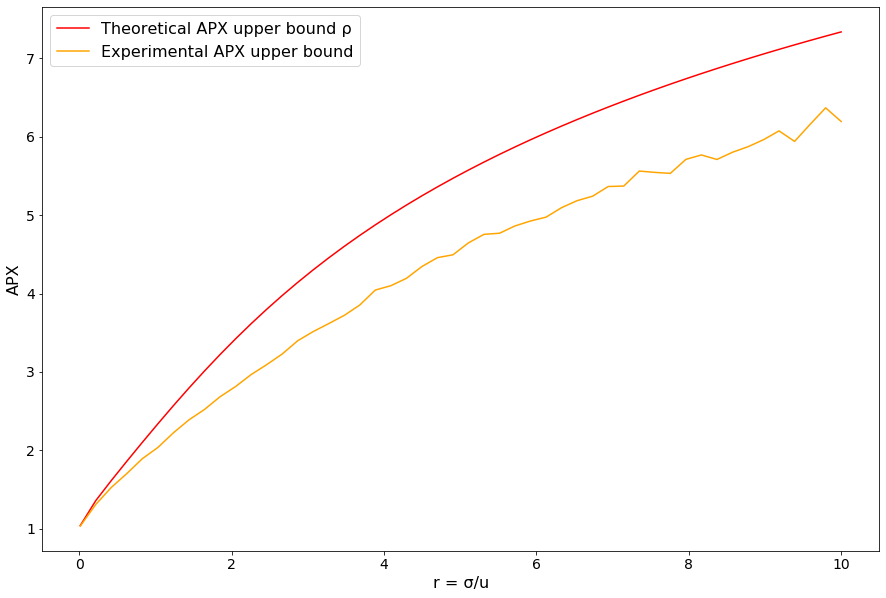

In [19]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 14)
plt.tick_params(axis='y', labelsize= 14)
#ax2.axhline(0,color="red")
plt.xlabel("r = \u03C3/u",fontsize=16)
plt.ylabel("APX",fontsize=16)

plt.plot(r_list, r_rho_list, color="red",label="Theoretical APX upper bound \u03C1")
plt.plot(r_list, APX_pareto1_list, color="#FFA500",label="Experimental APX upper bound")
plt.legend(loc="upper left",fontsize = 16)
#plt.savefig("p1m5_apx.png",bbox_inches='tight')

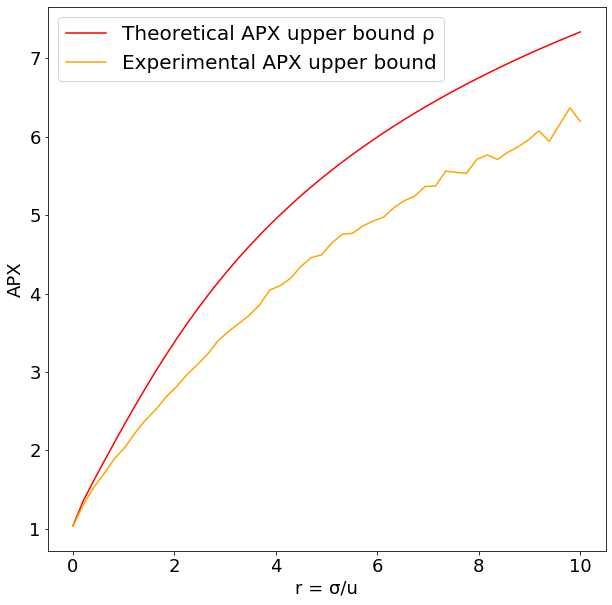

In [21]:
plt.figure(figsize=(10,10))
plt.tick_params(axis='x', labelsize= 18)
plt.tick_params(axis='y', labelsize= 18)
#ax2.axhline(0,color="red")
plt.xlabel("r = \u03C3/u",fontsize=18)
plt.ylabel("APX",fontsize=18)
# plt.axhline(u_m,color="red",label="Expected welfare")
#plt.plot(r_list, rho_list, marker="o",color="red",label="Theoretical \u03C1\u0303")
#plt.plot(r_list, rho_list, color="red",label="Theoretical DAPX upper bound \u03C1\u0303 ")
plt.plot(r_list, r_rho_list, color="red",label="Theoretical APX upper bound \u03C1")
plt.plot(r_list, APX_pareto1_list, color="#FFA500",label="Experimental APX upper bound")


plt.legend(loc="upper left",fontsize = 20)
#plt.savefig("p1m5_apx_s.png",bbox_inches='tight')

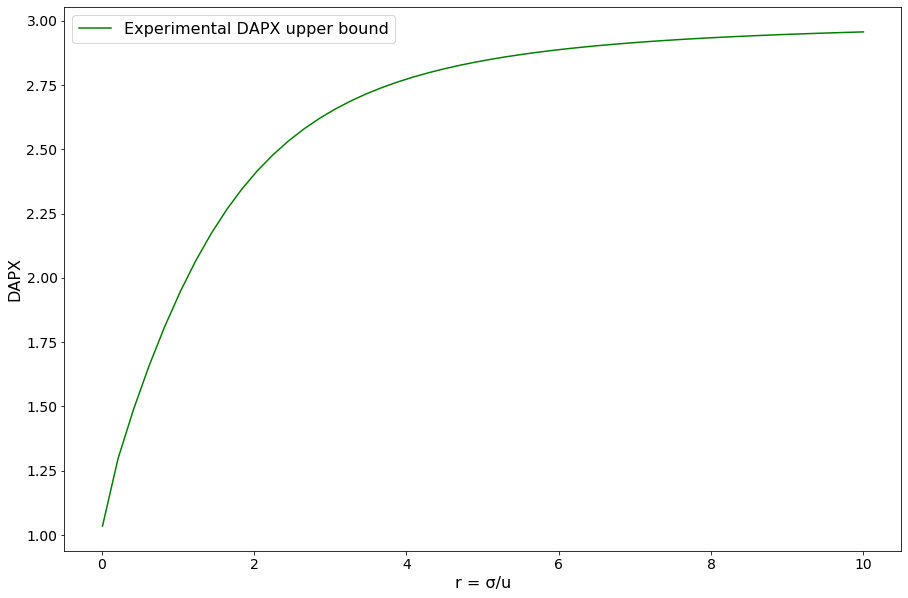

In [25]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 14)
plt.tick_params(axis='y', labelsize= 14)
#ax2.axhline(0,color="red")
plt.xlabel("r = \u03C3/u",fontsize=16)
plt.ylabel("DAPX",fontsize=16)

#plt.plot(r_list, rho_list, color="red",label="Theoretical DAPX upper bound \u03C1\u0303 ")
plt.plot(r_list, DAPX, color="green",label="Experimental DAPX upper bound")

plt.legend(loc="upper left",fontsize = 16)
#plt.savefig("p1m5_dapx_only.png",bbox_inches='tight')

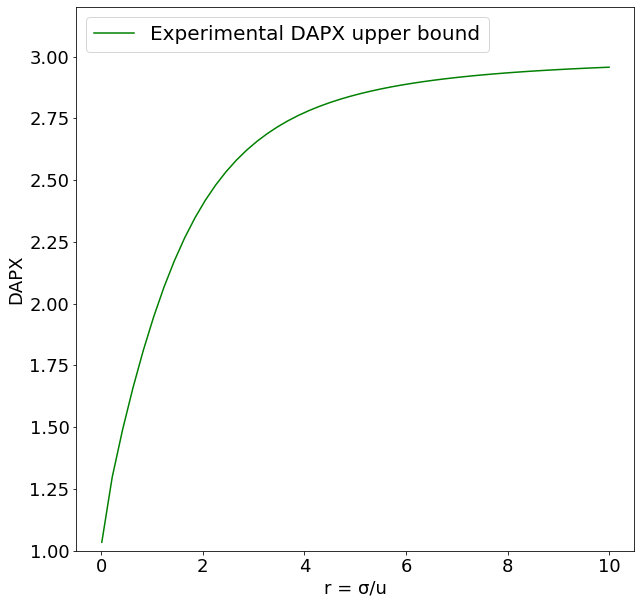

In [27]:
plt.figure(figsize=(10,10))
plt.tick_params(axis='x', labelsize= 18)
plt.tick_params(axis='y', labelsize= 18)
#ax2.axhline(0,color="red")
plt.xlabel("r = \u03C3/u",fontsize=18)
plt.ylabel("DAPX",fontsize=18)
#plt.plot(r_list, rho_list, color="red",label="Theoretical DAPX upper bound \u03C1\u0303 ")
plt.plot(r_list, DAPX, color="green",label="Experimental DAPX upper bound")

plt.ylim(1,3.2)
plt.legend(loc="upper left",fontsize = 20)
#plt.savefig("p1m5_dapx_only_s.png",bbox_inches='tight')

In [28]:
import pandas as pd 
  
# creating the DataFrame 
my_df = { 'r_list' : r_list,
          'u_m_list': u_m_list,
         'rev_A_list': rev_A_list,
         'APX_rev_list': APX_rev_list,
         'rev_A1_list': rev_A1_list,
         'rev_A2_list': rev_A2_list,
         'rho_list':rho_list,
         'DAPX': DAPX,
         'r_rho_list':r_rho_list,
         'APX_pareto1_list': APX_pareto1_list
         } 
df = pd.DataFrame(my_df) 
  
   
# saving the DataFrame as a CSV file 
gfg_csv_data = df.to_csv('p1m5.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 


CSV String:
 None
